# MAPS

### Today we are going to use Python to make maps.  many people use ARCgis or google maps etc.  But once you have data in python it is nice to be able to make maps right there in python.  then if you have multiple parameters you could also make lots of maps quickly!  So we are going to try and make a map.  And to make it interesting we are going to try and use the survey data from class!  To make this work I had to use my gmail account.  So lets look at the gmail account and map it!  I want to see where did you all go on your last break?  

This is the link to the survey I made https://docs.google.com/forms/d/e/1FAIpQLScJZYwhElLCu0QZFq5gcXB-b9mLb2p1d7SuOx4LjSDRqI0arQ/viewform?usp=send_form



This is the link to the responses
https://docs.google.com/spreadsheets/d/1REU9Djeu6Ig4qpsUqahVkxXoZ8AHp2oTrwtYN6sz0Do/edit?usp=sharing

So lets import the spreadsheet and look at it?

How should we get the data?  We could save the file as a csv file and then import it.  But what if the file changes?  A cool thing you can do with google is to import a spreadsheet directly!!!!!   

I didn't know how do this so I googled google spreadsheet into pandas.  

I found this http://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe

BUT THIS YEAR this came out.  Read the bottom. Life got easier!

We are going to need to import a lot of modules today.....

## Installing cartopy
Cartopy may not be installed on your python package.  To do it I google install cartopy. Then I get this webpage
http://scitools.org.uk/cartopy/docs/latest/installing.html
then at the command prompt or the terminal prompt I type this
conda install -c scitools cartopy
And it should go!

In [1]:
%matplotlib inline

import requests

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
from cartopy.io.img_tiles import OSM
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



1.  Got to our spreadsheet
https://docs.google.com/spreadsheets/d/1REU9Djeu6Ig4qpsUqahVkxXoZ8AHp2oTrwtYN6sz0Do/edit?usp=sharing
1.  Click file publish to web
1.  Instead of web page choose comma seperated file
1.  copy the link and you are set!  Instead of a file name you use the link!



In [3]:
pathtoCsv=r'https://docs.google.com/spreadsheets/d/1REU9Djeu6Ig4qpsUqahVkxXoZ8AHp2oTrwtYN6sz0Do/pub?output=csv'
data=pd.read_csv(pathtoCsv)

In [5]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 8 columns):
Timestamp                                                               19 non-null object
What is the name of the town or city you live in when not in school?    19 non-null object
What is the latitude of where you live                                  19 non-null object
What is the longitude of where you live                                 19 non-null object
Where Have you recently traveled?                                       18 non-null object
What is the latitude of where you traveled?                             18 non-null object
What is the longitude of where you traveled?                            18 non-null object
How many days were you in this location over spring break?              18 non-null object
dtypes: object(8)
memory usage: 1.3+ KB
None


It is all there but the column names don't look so great.  

In [20]:
print data.columns

Index([u'Timestamp',
       u'What is the name of the town or city you live in when not in school?',
       u'What is the latitude of where you live',
       u'What is the longitude of where you live',
       u'Where Have you recently traveled?',
       u'What is the latitude of where you traveled?',
       u'What is the longitude of where you traveled?',
       u'How many days were you in this location over spring break?'],
      dtype='object')


So lets give it better column names.

In [6]:
data.columns=['Time','Home','LatHome','LongHome','SB','LatSB','LongSB','TimeSB']
print data.head()

                  Time                         Home     LatHome    LongHome  \
0  10/26/2016 10:20:41  Clinton Hill, Brooklyn, NYC   40.687431  -73.963797   
1  10/26/2016 10:23:25                Littleton, NH   44.3062 N   71.7701 W   
2  10/26/2016 14:40:40                 Reisterstown   39.484444  -76.714979   
3  10/26/2016 16:52:14      New York, New York, USA   40.814888  -73.960521   
4  10/30/2016 13:29:35                 White Plains  41.0340° N  73.7629° W   

                      SB       LatSB       LongSB TimeSB  
0        Santiago, Chile   -33.43783   -70.650449      7  
1         Charleston, SC   32.7765 N    79.9311 W      4  
2  Olympic National Park   47.824859  -123.683229      3  
3    Cochabamba, Bolivia  -17.413977   -66.165322      0  
4                    NaN         NaN          NaN    NaN  


Here is a cleaner way to read in and rename and you don't have to do every column.  You use our dictionary trick.  with rename
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
I will show you and make a dictionary.  You can just copy from above to make the dictionary quickly

In [3]:
column_names={
    'Timestamp':'Time',
       'What is the name of the town or city you live in when not in school?':'Home',
       'What is the latitude of where you live':'LatHome',
       'What is the longitude of where you live':'LongHome',
       'Where Have you recently traveled?':'SB',
       'What is the latitude of where you traveled?':'LatSB',
       'What is the longitude of where you traveled?':'LongSB',
      'How many days were you in this location over spring break?':'TimeSB'
     }

In [10]:
pathtoCsv=r'https://docs.google.com/spreadsheets/d/1REU9Djeu6Ig4qpsUqahVkxXoZ8AHp2oTrwtYN6sz0Do/pub?output=csv'
data=pd.read_csv(pathtoCsv)
data.rename(columns=column_names, inplace=True)
print data.head()

                  Time                         Home     LatHome    LongHome  \
0  10/26/2016 10:20:41  Clinton Hill, Brooklyn, NYC   40.687431  -73.963797   
1  10/26/2016 10:23:25                Littleton, NH   44.3062 N   71.7701 W   
2  10/26/2016 14:40:40                 Reisterstown   39.484444  -76.714979   
3  10/26/2016 16:52:14      New York, New York, USA   40.814888  -73.960521   
4  10/30/2016 13:29:35                 White Plains  41.0340° N  73.7629° W   

                      SB       LatSB       LongSB  \
0        Santiago, Chile   -33.43783   -70.650449   
1         Charleston, SC   32.7765 N    79.9311 W   
2  Olympic National Park   47.824859  -123.683229   
3    Cochabamba, Bolivia  -17.413977   -66.165322   
4                    NaN         NaN          NaN   

  How many days were you in this location over spring break?  
0                                                  7          
1                                                  4          
2                

Now that is a nice dataset!!!!!  

BUT

You all made my life miserable.  Look at how you entered your latitude  and longitude.  We need to deal with them and I had no idea how to do this when I started making this notebook.  But this is real life. 

We could go through manually and fix them.  But imagine you had 1000 points or even more. You couldn't do it manually.  so we need to automate it.  

So I think using regular expressions is the way to go.  It allows us to match expressions.  So here we go! http://pythex.org/

Regular expressions are commonly used in unix and other scripting languages to match strings.  this way you can search through strings and look for things.  

First we are going to use Match or search.  If we import re then we can do re.match or re.search.  

There is a big difference.  

Match only checks the beginnging of the string.

Search checks the whole string.  

We are going to want to pull apart the letters and the numbers.

Regular expressions are used throughout programming to do matches.  I barely know them at all so we will stumble together.  

Lets start by doing a few searches.  Using a few websites and trying to match things.  Match does not return the match.  It returns a match object that then has its own functions!  


### First lets set up our text string 

text='Looking for a match 43'

then pattern is what we are going to match and we use the compile function to make python happier but it is not needed

pattern = re.compile(r"o")

Then we are going to do an if statement to see if there is a match.  

We are using search to search the whole string

don't get hung up in this area.  Go through it quick to get to the mapping.  It is just background


In [12]:
import re

In [13]:
text='Looking for a match 43'
pattern=re.compile(r"o")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

o


lets make sure our program is working.

In [14]:
text='Looking for a match 43'
pattern=re.compile(r"z")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

no match


If we want to search for other o's together we would add a + after the o

In [25]:
text='Looking for a match 43'
pattern=re.compile(r"o+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

oo


WE could also look for an m

In [26]:
text='Looking for a match 43'
pattern=re.compile(r"m")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

m


Adding a + after the m does nothing as there is no other m.  

In [27]:
text='Looking for a match 43'
pattern=re.compile(r"m+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

m


But if we used the periods it would match anything after the m.

In [28]:
text='Looking for a match 43'
pattern=re.compile(r"m.")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

ma


six periods....

In [29]:
text='Looking for a match 43'
pattern=re.compile(r"m......")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

match 4


But we could use special characters and get the work.  \w gives us any letter

In [30]:
text='Looking for a match 43'
pattern=re.compile(r"m\w")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

ma


A + at the end will now give us the whole word. 

In [31]:
text='Looking for a match 43'
pattern=re.compile(r"m\w+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

match


But lets focus on what we want.  We want the number.  So lets use the \d special character to just pull out the number

In [32]:
text='Looking for a match 43'
pattern=re.compile(r"\d")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4


But we want all the numbers.  So lets try a + and make the number longer. 

In [33]:
text='Looking for a match 4345'
pattern=re.compile(r"\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345


Does it work for a decimal number?

In [34]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345


crap that is bad.  But we could add a period to look for! 

In [35]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345.


Now we could get the number after decimal place

In [36]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
else:
    print 'no match'

4345.33


Now we could call that lat and use what it returns.  

In [37]:
text='Looking for a match 4345.33'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
    Lat=match.group()
else:
    print 'no match'

4345.33


But we will have trouble b/c lets look at the type

In [38]:
type(Lat)

str

we really need a float!

In [39]:
Lat=float(match.group())
type(Lat)

float

One last check is what if we don't have a decimal point in our number is it alright?

In [16]:
text='Looking for a match 4345d'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,text)
if match:
    print match.group()
    Lat=float(match.group())
    print type(Lat)
else:
    print 'no match'

4345
<type 'float'>


Also there is a bit of an inconsistency here.  We will see it in a minute. 

Unfortanately we can't extract straight for a pandas dataframe

In [15]:
text='Looking for a match 4345d'
pattern=re.compile(r"\d+.\d+")
match=re.search(pattern,data.LongSB)

TypeError: expected string or buffer

crap so that doesn't work!  We need to figure this out.  So I look up pandas and working with text.  http://pandas-docs.github.io/pandas-docs-travis/text.html

It uses regular expressions and we want to extract. To extract you have to put into parantheses.  

In [17]:
pattern=r"(\d+.\d+)"
data.LongSB.str.extract(pattern)

0      70.650449
1        79.9311
2     123.683229
3      66.165322
4            NaN
5        34.0522
6        27.9506
7      77.060174
8       114.3637
9        87.6298
10     75.787271
11    104.990251
12     73.565258
13      106.3742
14       74.9060
15       75.0152
16           105
17      122.4194
18       80.2707
Name: LongSB, dtype: object

But we got an nan.  so we messed up somehow.  

So lets go to http://pythex.org/  and try our regular expression.    Put in your pattern and your string and see if it works.  We learn it doesn't work when there is no decimal place.  So I scratched my head.  what you need is a ? to bring together the two expressions and work when a part is missing.  

In [18]:
pattern=r"(\d+.?\d+)"
data.LongSB.str.extract(pattern)

0      70.650449
1        79.9311
2     123.683229
3      66.165322
4            NaN
5        34.0522
6        27.9506
7      77.060174
8       114.3637
9        87.6298
10     75.787271
11    104.990251
12     73.565258
13      106.3742
14       74.9060
15       75.0152
16           105
17      122.4194
18       80.2707
Name: LongSB, dtype: object

Now we are doing better! BUT we we lost the negative signs!!!!  So I am still confused. So I looked up another cheat sheet.
http://stackoverflow.com/questions/15814592/how-do-i-include-negative-decimal-numbers-in-this-regular-expression  And this is what we need.
^-?\d*\.{0,1}\d+$ But we drop the \$ sign in case it ends with a letter!

So I gave up a little and used this one.  We could sit and play on pythex all day. It is sort of addictive but I want to get to a map.



In [21]:
pattern=r"(^-?\d*\.{0,1}\d+)"
data.LongSB.str.extract(pattern)

0      -70.650449
1         79.9311
2     -123.683229
3      -66.165322
4             NaN
5         34.0522
6         27.9506
7      -77.060174
8        114.3637
9         87.6298
10      75.787271
11    -104.990251
12     -73.565258
13       106.3742
14        74.9060
15        75.0152
16            105
17       122.4194
18        80.2707
Name: LongSB, dtype: object

Now we need to pullt out the W or S so we can multiply by -1.  The () mean extract.  the [] means anything in the []

In [22]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
print data.LongSB.str.extract(dpattern)

0     NaN
1       W
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8       W
9       W
10    NaN
11    NaN
12    NaN
13    NaN
14      W
15      W
16      W
17    NaN
18    NaN
Name: LongSB, dtype: object


Much easier now.  But this won't work to get the -1 from the dictionary.  So that is bad.  

In [23]:
direction[data.LongSB.str.extract(dpattern)]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

But we can use the map function! this maps a functions into pandas and saves us!

In [24]:
data.LongSB.str.extract(dpattern).map(direction)


0    NaN
1     -1
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8     -1
9     -1
10   NaN
11   NaN
12   NaN
13   NaN
14    -1
15    -1
16    -1
17   NaN
18   NaN
Name: LongSB, dtype: float64

Now we can pull out the number and pull out the Important letters so we could multiply. Lets try putting it together.  

In [25]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern)*data.LongSB.str.extract(dpattern).map(direction)

TypeError: can't multiply sequence by non-int of type 'float'

So we need it to be type float.  http://stackoverflow.com/questions/16643695/pandas-convert-strings-to-float-for-multiple-columns-in-dataframe

In [26]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).map(direction).astype('float')

0          NaN
1     -79.9311
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8    -114.3637
9     -87.6298
10         NaN
11         NaN
12         NaN
13         NaN
14    -74.9060
15    -75.0152
16   -105.0000
17         NaN
18         NaN
Name: LongSB, dtype: float64


But we lost a whole bunch of numbers.  This took me all day to figure out......  We could fill the missing values with any text we want.  I chose the string '1'.  Then we can convert that in our dictionary to 1 and we are set.  

In [27]:
data.LongSB.str.extract(dpattern).fillna('1')

0     1
1     W
2     1
3     1
4     1
5     1
6     1
7     1
8     W
9     W
10    1
11    1
12    1
13    1
14    W
15    W
16    W
17    1
18    1
Name: LongSB, dtype: object

In [28]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

print data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).fillna('1').map(direction).astype('float')

0     -70.650449
1     -79.931100
2    -123.683229
3     -66.165322
4            NaN
5      34.052200
6      27.950600
7     -77.060174
8    -114.363700
9     -87.629800
10     75.787271
11   -104.990251
12    -73.565258
13    106.374200
14    -74.906000
15    -75.015200
16   -105.000000
17    122.419400
18     80.270700
Name: LongSB, dtype: float64


Now we have one column converted and we have three more!  Lets try and actually convert it.  

In [29]:
dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

data.LongSB=data.LongSB.str.extract(pattern).astype('float')*data.LongSB.str.extract(dpattern).fillna('1').map(direction).astype('float')

print data.LongSB

0     -70.650449
1     -79.931100
2    -123.683229
3     -66.165322
4            NaN
5      34.052200
6      27.950600
7     -77.060174
8    -114.363700
9     -87.629800
10     75.787271
11   -104.990251
12    -73.565258
13    106.374200
14    -74.906000
15    -75.015200
16   -105.000000
17    122.419400
18     80.270700
Name: LongSB, dtype: float64


You can only run it once!   then it becomes NaN


In [4]:
pathtoCsv=r'https://docs.google.com/spreadsheets/d/1REU9Djeu6Ig4qpsUqahVkxXoZ8AHp2oTrwtYN6sz0Do/pub?output=csv'
data=pd.read_csv(pathtoCsv)
data.rename(columns=column_names, inplace=True)

dpattern=r"([WS])"
direction={'W':-1,'S':-1,'1':1}
pattern=r"(^-?\d*\.{0,1}\d+)"

convert=['LatHome','LongHome','LatSB','LongSB']

for c in convert:
    #print data[c]
    data[c]=data[c].str.extract(pattern).astype('float')*data[c].str.extract(dpattern).fillna('1').map(direction).astype('float')

print data


                   Time                         Home    LatHome    LongHome  \
0   10/26/2016 10:20:41  Clinton Hill, Brooklyn, NYC  40.687431  -73.963797   
1   10/26/2016 10:23:25                Littleton, NH  44.306200  -71.770100   
2   10/26/2016 14:40:40                 Reisterstown  39.484444  -76.714979   
3   10/26/2016 16:52:14      New York, New York, USA  40.814888  -73.960521   
4   10/30/2016 13:29:35                 White Plains  41.034000  -73.762900   
5    10/31/2016 9:50:34                     Sherborn -71.369800   42.239000   
6    10/31/2016 9:50:48                       Geneva   6.143200   46.204400   
7    10/31/2016 9:51:30               Lake Tahoe, CA  39.232509 -120.076892   
8    10/31/2016 9:51:32             Washington, D.C.  38.907200  -77.036900   
9    10/31/2016 9:53:15                   Vero Beach  27.000000  -80.000000   
10   10/31/2016 9:55:28                 New York, NY  40.712784  -74.005941   
11  10/31/2016 20:54:27                  Marlborough

We are still not perfect on our reading in because of the decimals. But you get the idea and we could keep working. But lets move on. I think you learned a lot

### Now we can map!!!!!!   

The beauty and trouble with python is all the modules that exist.  Some are great and some are not.  So you can spend time going down a wrong path to learn the module you are using is not the perfect one.  For mapping I came across two modules.

Basemap  http://matplotlib.org/basemap/ 

Cartopy  http://scitools.org.uk/cartopy/

Neither are perfect.  i used to use basemap and this week started using cartopy and really liked it.  So we are going to map with that.  What I want to do is make a map of peoples homes and where people went for spring break and then connect them via the great circle route.  They are both very similar and I may change my mind again.


To start we will turn on cartopy and add a map.  And we are going to use the stock earth image.  CArtopy is built on matplotlib so this should look very familiar.  

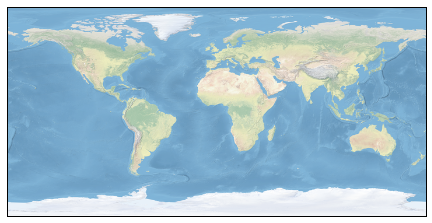

In [31]:
import cartopy.crs as ccrs
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

This should look familer to what we are doing. The only thing we did differnt was choose a projection and add an image to the projection.  You can also add countries and coastlines and other things.  this is the list of projections. http://scitools.org.uk/cartopy/docs/latest/crs/projections.html  Try one!


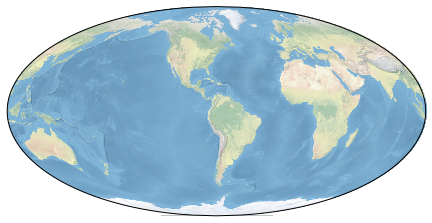

In [32]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-73)) #I centered it on new york!!!
ax.stock_img()

I am now going to use lines for countries etc...  We will see this again later but alpha is a transparency

C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


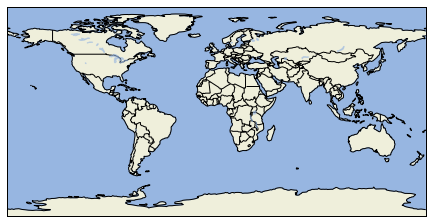

In [33]:
import cartopy.feature

fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)


You could put countries over the map.  with coastlines.

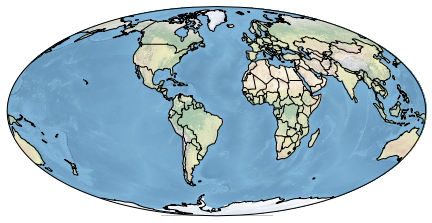

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-40)) #I centered it on new york!!!
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)

So lets plot our homes on the map.  But first lets talk latitude and longitude. I always get them mixed up....  This is for your reference.  Don't program it.

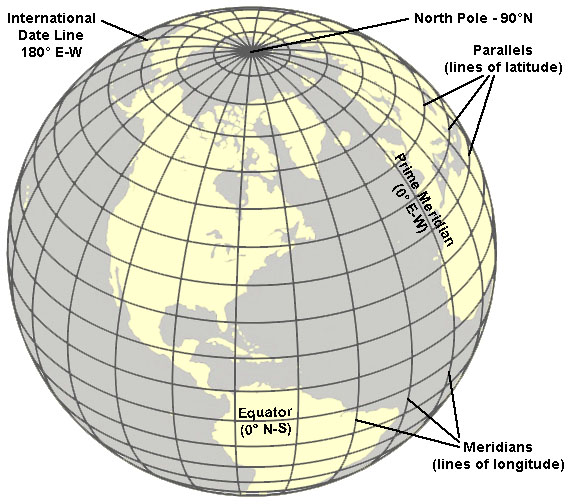

In [42]:
from IPython.display import Image
Image('globe.jpg')

You have longitude and latitude

Parallels = latitudes = North/South.  equator = 0 latitude.  North pole is 90N latitude.  New York City is about 40N.  This is a similar to a Y dimension when plotting

Longitude = Meridians = East/West. Prime Meridian through Greenwich is 0.  We are in the western hemisphere and NYC is about 73W or -73.  This is similar to an x dimension when plotting.  

When ever we talk we talk about latitude and longitude.  But when we plot in computer programs we flip the order to make it x and y.   

### This flip always confuses me!

Also and this is critical, when we plot in a computer we are taking a globe and putting it on a flat piece of paper.  So the coordinates have to get converted.  So there are many times things need conversion!

# Remember to convert!
You might need to convert coordinates.  This gets me sometimes

So lets add our scatter points!

### See the Transform key word!!!

C:\Users\bmailloux\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


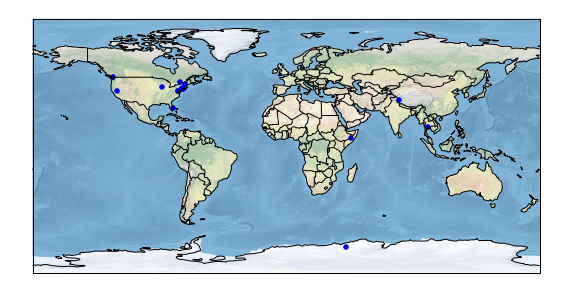

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) #I centered it on new york!!!
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())

### Looks Great!
We might have one typo with someone living in Norhtern India.   But I think I have had student from there! Next time I should give more instruction about what are good numbers or we could try and fixing them...   I am going to ignore them.

But Now you can add the trip points in a differnt color! 

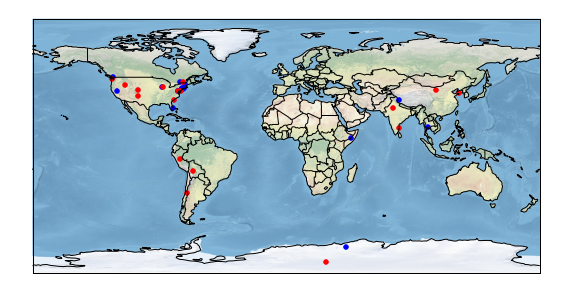

Now I would like to add a line connecting the two points showing where people traveled!  Here is our example. http://scitools.org.uk/cartopy/docs/latest/examples/global_map.html
We need to add an ax.plot and then transform it. 

### Flashback
When matplotlib does plotting it gives a text location.  This can get long and annoying.  Back on the first day of pandas I snuck in a line of code to get rid of the writing. I will do it again now.
ax.get_figure().suptitle("")

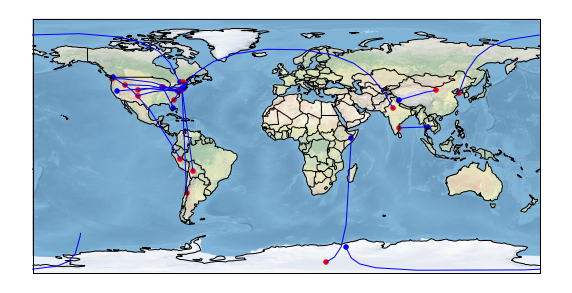

In [40]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())

ax.plot([data.LongHome, data.LongSB], [data.LatHome, data.LatSB], color='blue', transform=ccrs.Geodetic())

ax.get_figure().suptitle("")

Sometimes we want to look at smaller areas.  Next we are going to look at the NYC residents and where they live.  I usually set the coordinates of where we want to look.  People like to use the nomenclature ll=lower left and ur=upper right
so we can set the extent

ll_lat=40

ll_long=-74

ur_lat=43

ur_long=-72

This is for your reference

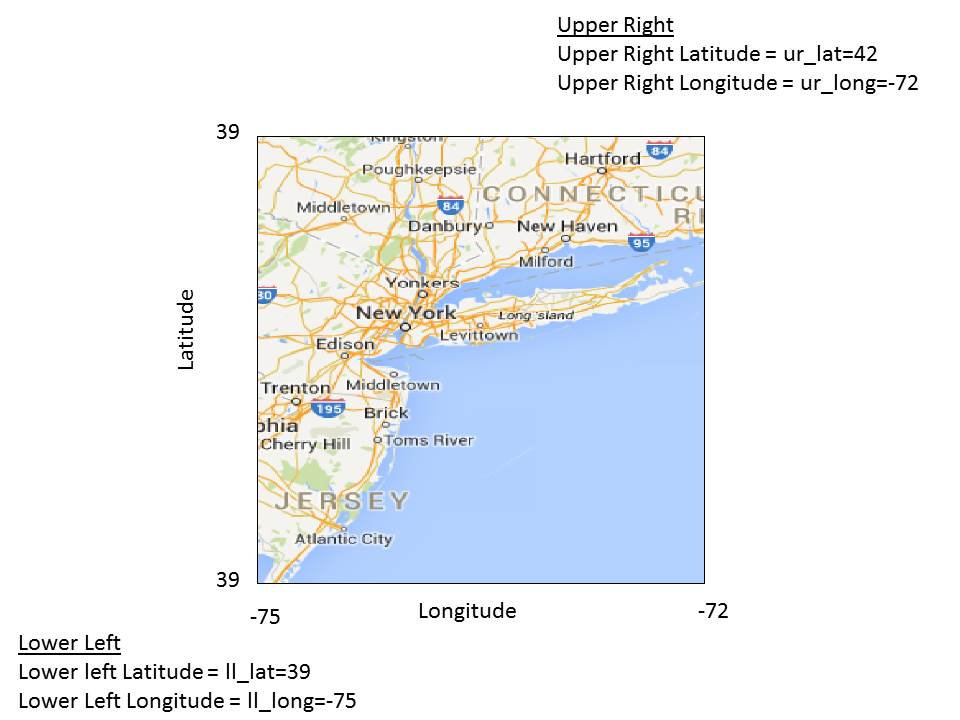

In [43]:
Image('latitude-longitude.jpg',width=600) 

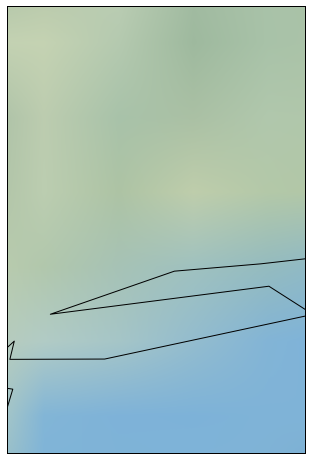

In [44]:
plt.figure(figsize=(8, 8))

ll_lat=40
ll_long=-74
ur_lat=43
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)

# Specify a region of interest, in this case, Cardiff.
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2


So when we zoom in that map is useless.  But we can add google maps!!!!!  we use from cartopy.io.img_tiles import GoogleTiles.  Here is the example http://nbviewer.ipython.org/github/ThomasLecocq/geophysique.be/blob/master/2014-02-25%20Shaded%20Relief%20Map%20in%20Python.ipynb


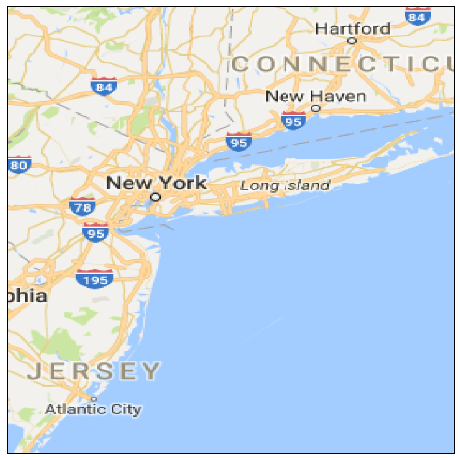

In [45]:
from cartopy.io.img_tiles import GoogleTiles

plt.figure(figsize=(8, 8))

#set the region
ll_lat=39
ll_long=-75
ur_lat=42
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest by specifying the extent
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 7,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

Now lets add our scatter points for Spring Break.   

Try changing between streets, terrain, and sattelite.  

### the zoom level is critical!
this is the 7.  If you set it too high you will be downloading data from google all day.  Start small and slowly increase it as you need a nicer map

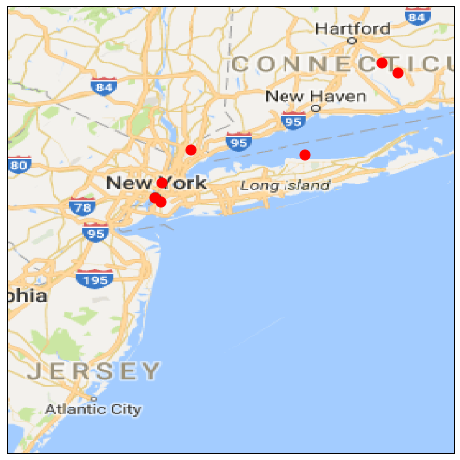

In [46]:
plt.figure(figsize=(8, 8))

ll_lat=39
ll_long=-75
ur_lat=42
ur_long=-72

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 7,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())


Now lets just zoom in on the manhattan points.  

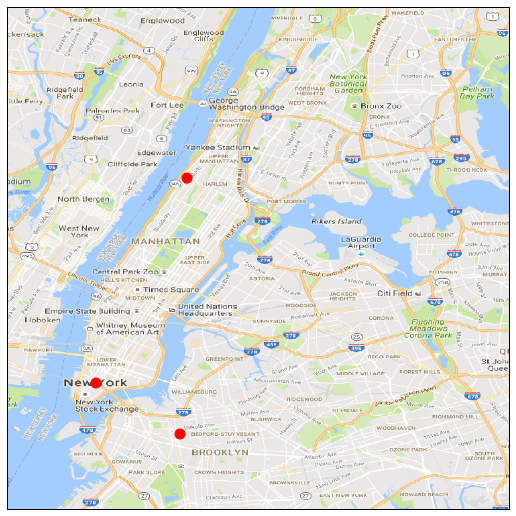

In [49]:
plt.figure(figsize=(10, 9))

ll_lat=40.65
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())

Now lets add some tags.  It is the same as we did for the linregress just with lat and long.  

http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot

more than you will ever need to know. 
http://matplotlib.org/users/annotations_guide.html


The one key addition is we need to transform our coordinate system and put that in.  Here is where I learned it.
http://stackoverflow.com/questions/25416600/why-the-annotate-worked-unexpected-here-in-cartopy
You just need the extra transform notation.    

This is not going to work. But this is my first attempt and then we will debug.  

In [50]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongHome,data.LatHome, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

# this should loop over the data and print the name for each one.  
for i in data.index:
    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)

ValueError: width and height must each be below 32768

Something went wrong and this makes no sense to me.  How do we debug this?  I am not sure.  I am going to start by printing out my for loop to make sure that is working correctly.  

0 Clinton Hill, Brooklyn, NYC -73.963797 40.687431
1 Littleton, NH -71.7701 44.3062
2 Reisterstown -76.714979 39.484444
3 New York, New York, USA -73.960521 40.814888
4 White Plains -73.7629 41.034
5 Sherborn 42.239 -71.3698
6 Geneva 46.2044 6.1432
7 Lake Tahoe, CA -120.076892 39.232509
8 Washington, D.C. -77.0369 38.9072
9 Vero Beach -80.0 27.0
10 New York, NY -74.005941 40.712784
11 Marlborough -72.479654 41.622315
12 Colchester, CT -72.376904 41.55127
13 Charleston SC 79.9311 32.7765
14 Waukegan,IL -87.8448 42.3636
15 Vancouver -123.1207 49.2827
16 Dobbs Ferry -73.0 41.0
17 Ottawa -75.6972 45.4215
18 Bangkok 100.5018 13.7563


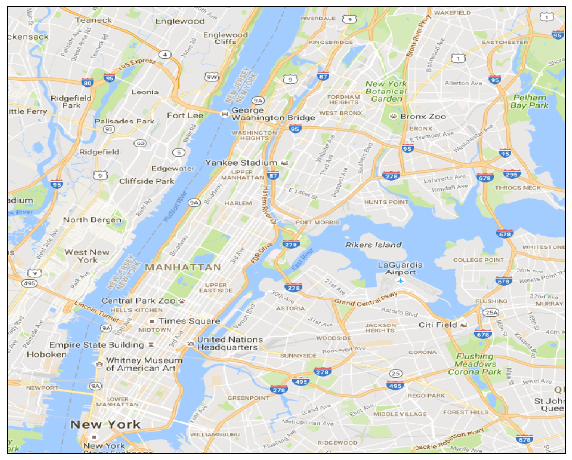

In [51]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
    print i,data.loc[i].Home,data.loc[i].LongHome,data.loc[i].LatHome
#    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
#                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
#                va = 'bottom', bbox = props, xycoords=transform)

That worked perfectly.  So the for loop worked.  My next idea is maybe it doesn't like it when some points aren't on the plot.  So I know point 10 is good. So I am going to stop the for loop and just test point 10.

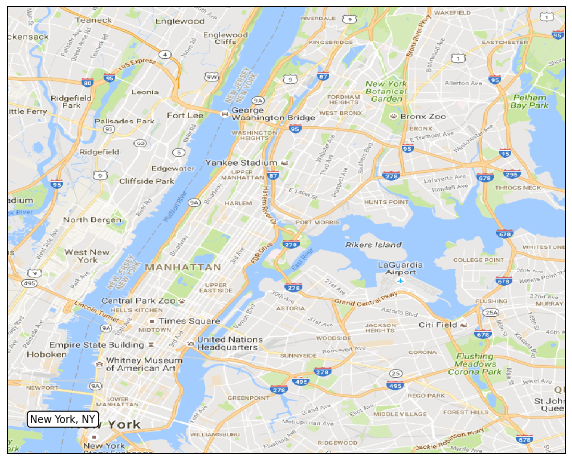

In [52]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

#for i in data.index:
i=10
ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)


That worked great.  So now I think my hunch was corect.  Next what I think I will do it try the whole world with no extent but you have to change the zoom on google maps else we crash.  

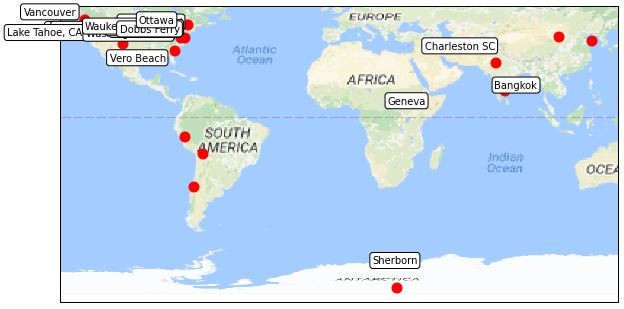

In [53]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
#ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
#              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 1,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
    ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)


That was awesome!!!!  Now we know the problem. It crashes if we tries to do a label outside the extent.  So we can just put an if statement in the for loop and just plot the points within the extent.  I am going to break the if statement onto a few lines.  you need to put it into parentheses to do this.  i will also turn the extent back on and the zoom back to 12.  

in if
in if


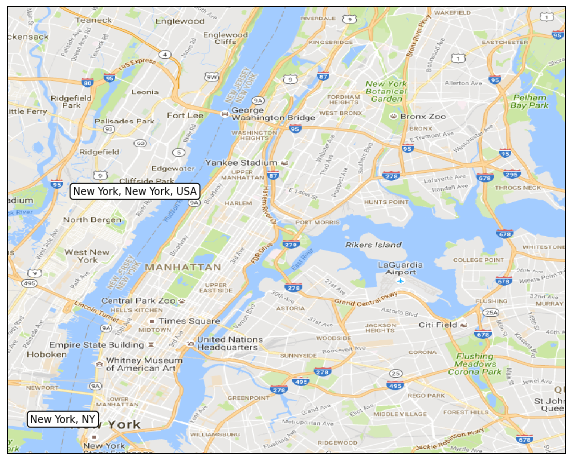

In [54]:
plt.figure(figsize=(10, 9))

ll_lat=40.7
ll_long=-74.05
ur_lat=40.9
ur_long=-73.8

# Use the tile's projection for the underlying map.
ax = plt.axes(projection=ccrs.PlateCarree())

# Specify a region of interest
ax.set_extent([ll_long, ur_long, ll_lat, ur_lat],    
              ccrs.PlateCarree())                     # this is x1,x2, y1,y2

gg_tiles = GoogleTiles(style='street') #we can change the style of teh figure from 'streets' to 'terrain' to 'satellite'
ax.add_image(gg_tiles, 12,alpha=1)   #the number is the zoom level and the alpha is if it is transparent

ax.scatter(data.LongSB,data.LatSB, color='red', s=100, transform=ccrs.PlateCarree())

props=dict(boxstyle='round',facecolor='white',alpha=1)
transform = ccrs.PlateCarree()._as_mpl_transform(ax)   #this gives us the transformed  coordinates.   

for i in data.index:
        if (data.loc[i].LongHome>ll_long and 
            data.loc[i].LongHome<ur_long and
            data.loc[i].LatHome>ll_lat   and
            data.loc[i].LatHome<ur_lat):
            print 'in if'
            ax.annotate(str(data.loc[i].Home), xy = (data.loc[i].LongHome,data.loc[i].LatHome),
                xytext=(-10,0),textcoords = 'offset points', ha = 'right', 
                va = 'bottom', bbox = props, xycoords=transform)

Fixing overlapping points is brutal. so ignore them.

You are now well on your way to mapping!  I made an extra one below with nicer tick marks.  I am sort of angry at Python right now.  Cartopy makes the nicer and easier map especially with the great circle route but I know basemap does better tick marks.  All we can do is keep moving forward.  It is all nice.  

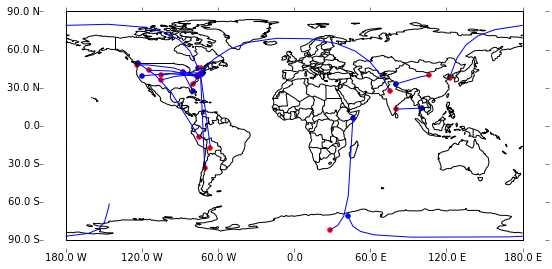

In [6]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
mapProjection='ccrs.PlateCarree()'


fig,ax=plt.subplots()
fig.set_size_inches(9,9)
ax = plt.axes(projection=ccrs.PlateCarree()) 
#ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())

ax.plot([data.LongHome, data.LongSB], [data.LatHome, data.LatSB], color='blue', transform=ccrs.Geodetic())

ax.set_xticks([-180,-120,-60,0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol=' ',
                                       dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='>.1f',
                                      degree_symbol=' ')

ax.tick_params(direction='out', pad=0)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)



# Answers

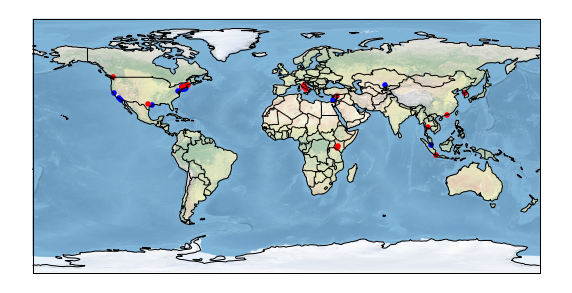

In [66]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.scatter(data.LongHome,data.LatHome, color='b',  transform=ccrs.PlateCarree())
ax.scatter(data.LongSB,data.LatSB, color='red',  transform=ccrs.PlateCarree())